In [3]:
import jax.numpy as np


v0 = 1
Ca0 = 1
H = 1
Fa0 = v0 *  Ca0

def CSTR(u):
    
    
    R  = u[0]
    RT = u[1]
    
    volume = np.pi * R **2  * H

    k1 = np.exp(-3 / RT)
    k2 = np.exp(-10 / RT)


    a =  volume * k1
    b = v0 + volume*k2
    c = - v0 * Ca0

    Ca = (-b + np.sqrt(b**2 - 4 * a * c)) / (2 * a)

    Cb = k1 * Ca**2 * volume / v0

    return np.array([Ca, Cb])

In [ ]:
from opyrability import multimodel_rep, OI_eval

# AIS Bounds
AIS_bounds = np.array([[0.25,  3.00],
                       [1.00, 15.00]])
# Discretization Resolution.
AIS_resolution = [15, 15]

# Model assignment.
model = CSTR

# Obtain AOS.
AOS_region = multimodel_rep(model, 
                            AIS_bounds, 
                            AIS_resolution)


# DOS Bounds and resolution
DOS_bounds = np.array([[0.1   ,   0.35],
                       [0.45,   0.65]])
# Obtain Operability Index (OI).
OI = OI_eval(AOS_region, DOS_bounds)

 You have selected automatic differentiation as a method for obtaining higher-order data (Jacobians/Hessian). Make sure your process model is JAX-compatible implementation-wise.


  0%|          | 0/625 [00:00<?, ?it/s]

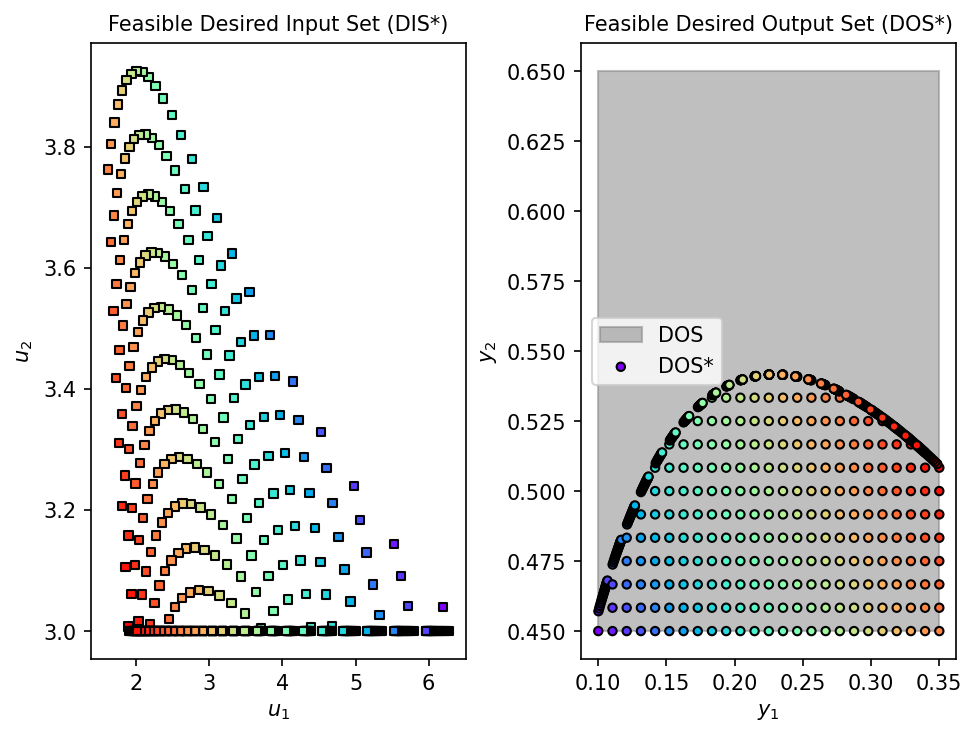

In [6]:
from opyrability import nlp_based_approach


u0 = np.array([3 , 10])

lb = np.array([0.25, 3])
                  
ub = np.array([50, 50])

DOS_bounds = np.array([[0.1 ,   0.35],
                       [0.45,   0.65]])


DOS_resolution = [25, 25]
    

fDIS, fDOS, message = nlp_based_approach(CSTR, 
                                        DOS_bounds,
                                        DOS_resolution,
                                        u0,
                                        lb,
                                        ub,
                                        method='ipopt',
                                        plot=True,
                                        ad=True,
                                        warmstart=True)

In [ ]:
from pprint import pprint 
pprint(message)